<a href="https://colab.research.google.com/github/lillybethw/DS1002/blob/main/Assignments/06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [58]:
import pandas as pd
import numpy as np

---

In [59]:
plist = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [60]:
plist = pd.Series(plist)

3. Take the above series and add an index that starts at 2 and steps by 3

In [61]:
newindex = pd.RangeIndex(start=2, stop=5, step=3)
plist = plist.reindex(newindex)
plist

2    46
dtype: int64

4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [62]:
dictionary = {
    'name': ['Billy', 'Martha', 'Sam', 'Kate'],
    'age': [32, 44, 21, 65],
    'career': ['doctor', 'teacher', 'therapist', 'firefighter']
}
df = pd.DataFrame(dictionary)
df

,name,age,career
0,Billy,32,doctor
1,Martha,44,teacher
2,Sam,21,therapist
3,Kate,65,firefighter


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [64]:
df.rename_axis('participant_id')

,name,age,career
participant_id,,,
0,Billy,32,doctor
1,Martha,44,teacher
2,Sam,21,therapist
3,Kate,65,firefighter


6. Use a pandas function to determine the data types of the columns of `df`.

In [65]:
print(df.dtypes)

name      object
age        int64
career    object
dtype: object


7. Using bracket notation, reference column `name`

In [67]:
df['name']

0     Billy
1    Martha
2       Sam
3      Kate
Name: name, dtype: object

8. Using dot notation, reference column `name`

In [69]:
df.name

0     Billy
1    Martha
2       Sam
3      Kate
Name: name, dtype: object

8. Reference column `name` and have it returned in a dataframe.

In [70]:
pd.DataFrame(df.name)

,name
0,Billy
1,Martha
2,Sam
3,Kate


9. Show the 3rd element in column `career`.

In [71]:
df.career[2]

'therapist'

10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [76]:
!pip install seaborn
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [80]:
corr = str(iris['sepal_length'].corr(iris['sepal_width']))
print('The correlation between sepal length and width is ' + corr)

The correlation between sepal length and width is -0.11756978413300208


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [103]:
iris_w_index = iris.set_index(['species'])
setosa = iris_w_index.loc['setosa']
setosacorr = setosa['sepal_length'].corr(setosa['sepal_width'])
versicolor = iris_w_index.loc['versicolor']
verscorr = versicolor['sepal_length'].corr(versicolor['sepal_width'])
virginica = iris_w_index.loc['virginica']
virgcorr = virginica['sepal_length'].corr(virginica['sepal_width'])
print(setosacorr, verscorr, virgcorr)

0.7425466856651597 0.5259107172828243 0.4572278163941129


**setosa has the highest correlation between sepal length and width, with a correlation of 0.743

13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative correlation?  Again, include calculations to support your answer.

In [136]:
setosa_matrix = (setosa.corr()).min()
versicolor_matrix = (versicolor.corr()).min()
virginica_matrix = (virginica.corr()).min()
print(setosa_matrix, versicolor_matrix, virginica_matrix)

sepal_length    0.267176
sepal_width     0.177700
petal_length    0.177700
petal_width     0.232752
dtype: float64 sepal_length    0.525911
sepal_width     0.525911
petal_length    0.560522
petal_width     0.546461
dtype: float64 sepal_length    0.281108
sepal_width     0.401045
petal_length    0.322108
petal_width     0.281108
dtype: float64


for the setosa species, the lowest correlation is between sepal width and petal length (0.178). For versicolor it's sepal length and sepal width(0.526), and for virginica it's sepal length and petal width (0.281).

14.  Show a scatter plot of the data from your answer to problem 13.  That is, for whichever species and pair of variables you found to have the most negative correlation, make a scatter plot of those two variables for the given species.


<Axes: xlabel='sepal_width', ylabel='petal_length'>

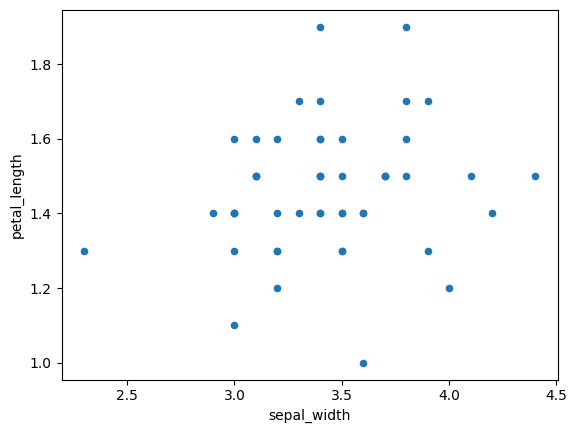

In [142]:
#setosa sepal width and petal length
setosa.plot.scatter('sepal_width', 'petal_length')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

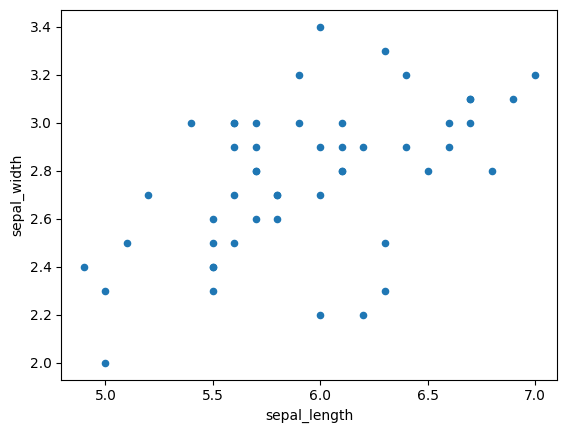

In [140]:
#versicolor sepal length and width
versicolor.plot.scatter('sepal_length', 'sepal_width')

<Axes: xlabel='sepal_length', ylabel='petal_width'>

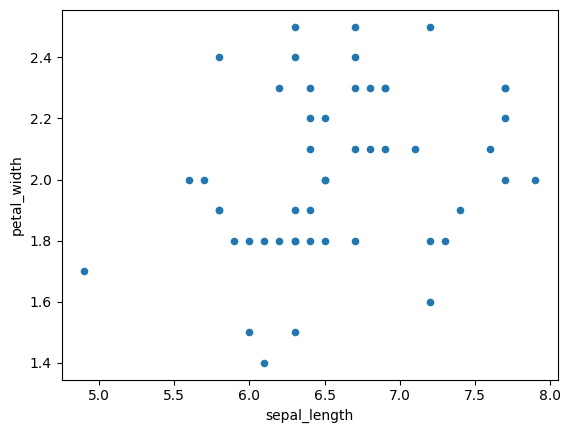

In [141]:
#virginica petal width and sepal length
virginica.plot.scatter('sepal_length', 'petal_width')